In [8]:
import os
import numpy as np
from numpy.random import randn
import pandas as pd
from scipy import stats
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
%matplotlib inline

dir_name='OULAD'

assessments_path=os.path.join(dir_name+'/assessments.csv')
courses_path=os.path.join(dir_name+'/courses.csv')
studentAssessment_path=os.path.join(dir_name+'/studentAssessment.csv')
studentInfo_path=os.path.join(dir_name+'/studentInfo.csv')
studentRegistration_path=os.path.join(dir_name+'/studentRegistration.csv')
#studentVle_path=os.path.join(dir_name+'/studentVle.csv')
vle_path=os.path.join(dir_name+'/vle.csv')

assessments_df=pd.read_csv(assessments_path)
courses_df=pd.read_csv(courses_path)
stu_assess_df=pd.read_csv(studentAssessment_path)
stu_info_df=pd.read_csv(studentInfo_path)
stu_registration_df=pd.read_csv(studentRegistration_path)
#stu_vle_df=pd.read_csv(studentVle_path)
vle_df=pd.read_csv(vle_path)

## utility functions written so far
***

### To get basic characteristics I usually look for in a dataframe

In [9]:
def infoOnDf(df,name_of_df=''):
    infoDict={"Name of the DataFrame":name_of_df}
    #add the dimension information
    dim=df.shape
    infoDict['Dimension']=dim
    #Add column names and associated datatypes information in a list
    infoDict['Data Types of Columns']=df.dtypes
    return infoDict

def infoOnDf_full(df,name_of_df=''):
    infoDict={"Name of the DataFrame":name_of_df}
    #add the dimension information
    dim=df.shape
    infoDict['Dimension']=dim
    #Add column names and associated datatypes information in a list
    infoDict['Data Types of Columns']=df.dtypes
    infoDict['First few rows']=df.head()
    infoDict['Brief Stats of df']=df.describe()
    return infoDict

### To print pretty the returned dictionary of the above function

In [10]:
def printDictPretty(dict):
    for key,value in dict.items():
        print(key)
        print('\n')
        print(value)
        print('\n')


### To changethe XXXXB and XXXXJ into XXXX_Feb and XXXX_Oct, respectively 

### And to apply to the an entire column

### They were used to add a new column to the original df

In [11]:
def BtoFeb(yearTerm):
    yearMonth=yearTerm.replace("B","_Feb",1)
    return yearMonth

def JtoOct(yearTerm):
    yearMonth=yearTerm.replace("J","_Oct",1)
    return yearMonth

def termToMonth(yearTerm):
    if yearTerm[4]=="B":
        yearMonth=BtoFeb(yearTerm)
    if yearTerm[4]=="J":
        yearMonth=JtoOct(yearTerm)
    else:
        yearMonth=yearTerm
    return yearMonth


### To check if there are duplicate entries in each course+each session

In [12]:
def checkDuplicates(df,module_name="AAA",presentation="2013J"):
    course=df[df['code_module']==module_name]
    session=course[course['code_presentation']==presentation]
    registeredStudents=session.id_student
    n_student=len(registeredStudents)
    uniqueStudents=len(registeredStudents.unique())
    if uniqueStudents == n_student:
        return True
    else:
        return False

### To check if a student has completed the course

### It was used to add a new column to the original df

In [13]:
def isCompleted(unreg_record):
    #if date_unregistration is ?? then yes
    if unreg_record=='?':
        return True
    else:
        return False

### To generate a statistics on how many student registered and how many have finished the course

In [60]:
def generateRegStats(df,module_name="AAA",presentation="2013J"):
    pass
    #Count the number of registered students at the beginning
    course=df[df['code_module']==module_name]
    session=course[course['code_presentation_month']==presentation]
    n_registered=session.id_student.size
    n_completed=session[session['completed']].id_student.size
    #statsDict={"Module Code":module_name,"Presentation":presentation,"Registered Students":n_registered,"Completed Students":n_completed}
    #Cuz I need to return a row of a df
    return([module_name,presentation,n_registered,n_completed])

## Load the necessary Datasets. In this notebook, I will only download the student registration Dataset, which I worked with. The codes for loading other datasets are in the April_21_EDA_on_Courses_data notebook

In [15]:
studentRegistration_path=os.path.join(dir_name+'/studentRegistration.csv')
stu_registration_df=pd.read_csv(studentRegistration_path)

## Let's have a look at the original dataset

In [16]:
stu_registration_df.head(10)

,code_module,code_presentation,id_student,date_registration,date_unregistration
0,AAA,2013J,11391,-159,?
1,AAA,2013J,28400,-53,?
2,AAA,2013J,30268,-92,12
3,AAA,2013J,31604,-52,?
4,AAA,2013J,32885,-176,?
5,AAA,2013J,38053,-110,?
6,AAA,2013J,45462,-67,?
7,AAA,2013J,45642,-29,?
8,AAA,2013J,52130,-33,?
9,AAA,2013J,53025,-179,?


### What I am going to add:
1. add a column named code_presentation_month which will store the code representation in the format of months instead of B or J.
2. add a column named completed that indicates if a studnet finished the course without withdrawsing. It was mappedfrom date_unregistration column 
3. contstruct a new dataframe that stores the number of students registered for each class and the number of students who finished the course.

#### 1.

In [17]:
stu_registration_df['code_presentation_month']=stu_registration_df.code_presentation.apply(termToMonth)

#### 2.

In [18]:
stu_registration_df['completed']=stu_registration_df.date_unregistration.apply(isCompleted)

#### 3.

In [86]:
#registrationStatistics=pd.DataFrame(columns = ['code_module','code_presentation_month','n_students_beg','n_students_end'])
#registrationStatistics=pd.DataFrame()
registrationStatistics=list()

In [87]:
module_list=['AAA']
presentation_list=['2013_Oct','2014_Oct']
for m in module_list:
    for session in presentation_list:
        new_stats=generateRegStats(stu_registration_df,module_name=m,presentation=session)
        #new_stats=pd.DataFrame(np.array(new_stats))
        #registrationStatistics=pd.concat([registrationStatistics,new_stats],axis=1)
        egistrationStatistics=registrationStatistics.append(new_stats)

In [88]:
print(registrationStatistics)

[['AAA', '2013_Oct', 383, 323], ['AAA', '2014_Oct', 365, 299]]


In [90]:
pd.DataFrame(registrationStatistics,columns = ['code_module','code_presentation_month','n_students_beg','n_students_end'])

,code_module,code_presentation_month,n_students_beg,n_students_end
0,AAA,2013_Oct,383,323
1,AAA,2014_Oct,365,299


#### 3. Cleaner...

In [91]:
registrationStatistics=list()
module_list=['AAA']
presentation_list=['2013_Oct','2014_Oct']

In [92]:
for m in module_list:
    for session in presentation_list:
        new_stats=generateRegStats(stu_registration_df,module_name=m,presentation=session)
        egistrationStatistics=registrationStatistics.append(new_stats)

In [93]:
registrationStatistics=pd.DataFrame(registrationStatistics,columns = ['code_module','code_presentation_month','n_students_beg','n_students_end'])

In [94]:
registrationStatistics

,code_module,code_presentation_month,n_students_beg,n_students_end
0,AAA,2013_Oct,383,323
1,AAA,2014_Oct,365,299


## Visualization

## Let's see how many students registered for eachterm, and how many have finished the course

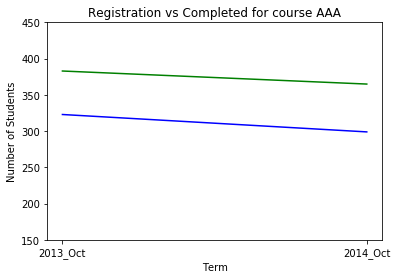

In [102]:
plt.plot(registrationStatistics.code_presentation_month,registrationStatistics.n_students_beg,color='g')
plt.plot(registrationStatistics.code_presentation_month,registrationStatistics.n_students_end,color='blue')
plt.xlabel('Term')
plt.ylabel('Number of Students')
plt.ylim(150, 450)
plt.title('Registration vs Completed for course AAA')
plt.show()